In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
auc_score = pd.read_csv('auc_score.csv')

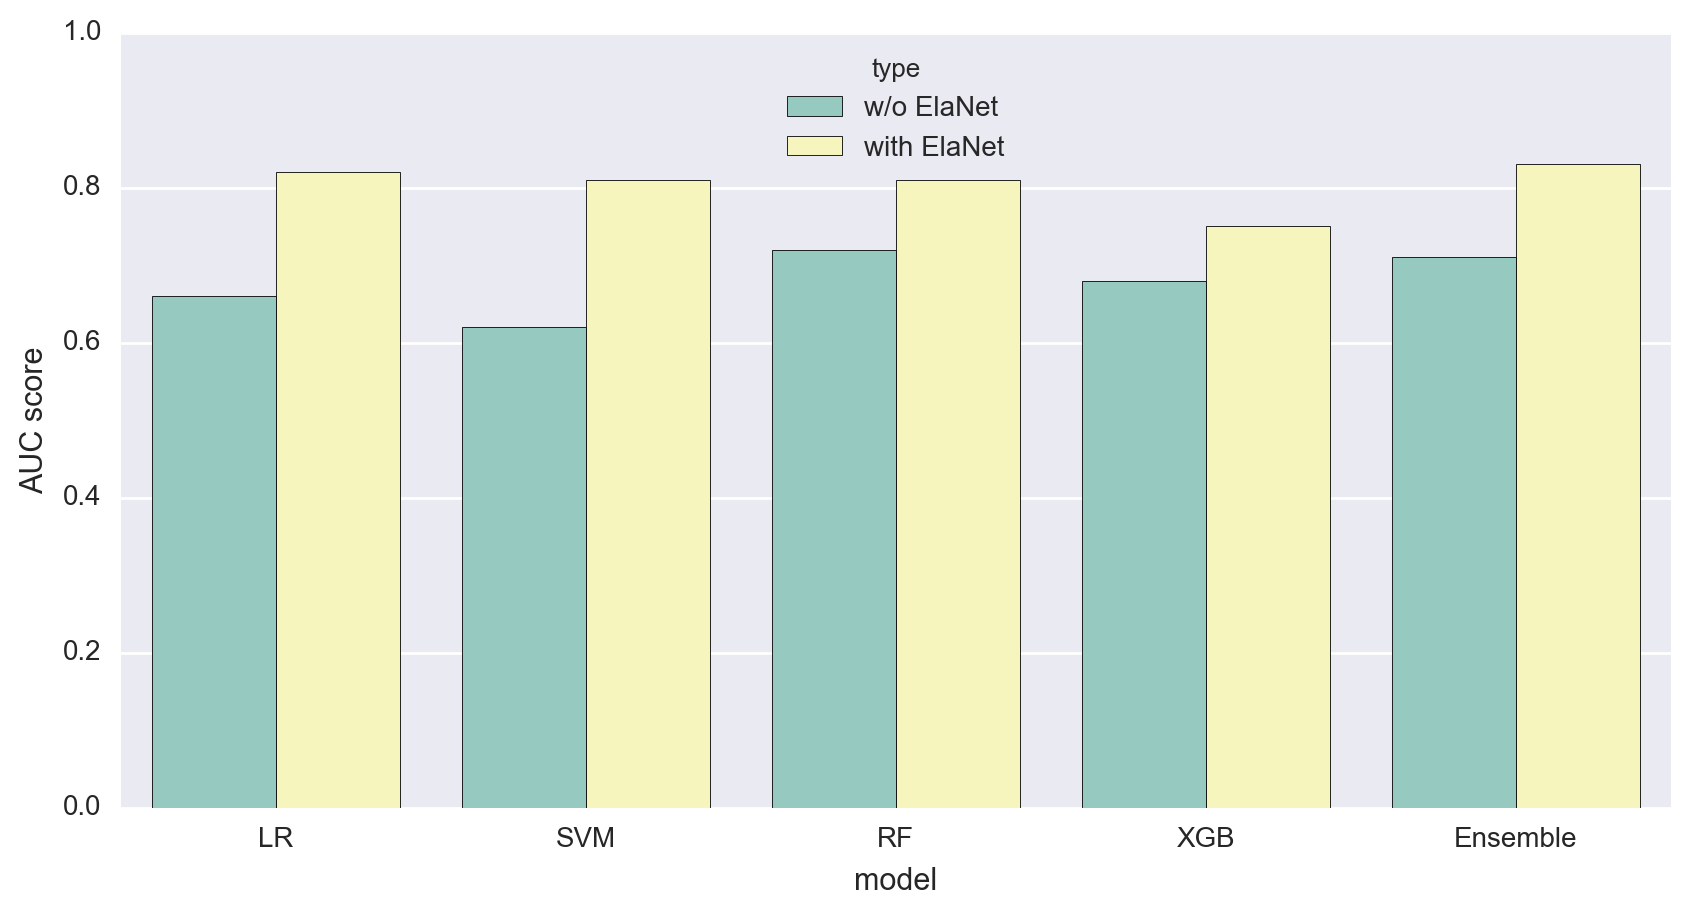

In [56]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(x="model", y="auc", hue="type", data=auc_score, palette="Set3")
plt.ylim(0,1.0)
ax.set_ylabel('AUC score')

In [2]:
abdose_adult = pd.read_csv('Adult_copy.csv')

In [3]:
num_missing_all = 0
num_missing = 0

for column in abdose_adult:
    if abdose_adult[column].isnull().sum() != 0:
        num_missing += 1

for column in abdose_adult:
    if abdose_adult[column].isnull().sum() == len(abdose_adult):
        num_missing_all += 1

print('---------------------------------------------------------------------')
print('Number of columns with missing/nonexistent:                     ', num_missing)
print('Number of columns with missing/nonexistent data on every entry: ', num_missing_all)
print('Number of total columns:                                        ', len(abdose_adult.columns))

---------------------------------------------------------------------
Number of columns with missing/nonexistent:                      2823
Number of columns with missing/nonexistent data on every entry:  1219
Number of total columns:                                         3008


# success/failure 48 hour follow up APACHE

In [7]:
success_48_apache = abdose_adult[abdose_adult['fu48_clinical_outcome']==1].apache
failure_48_apache = abdose_adult[abdose_adult['fu48_clinical_outcome']!=1].apache

In [11]:
stats.ttest_ind(success_48_apache.dropna(),
                failure_48_apache.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-0.71475187307038923, pvalue=0.475961075752658)

# success/failure 48 hour follow up CRP

In [12]:
success_48_crp = abdose_adult[abdose_adult['fu48_clinical_outcome']==1].fu48_crp
failure_48_crp = abdose_adult[abdose_adult['fu48_clinical_outcome']!=1].fu48_crp

stats.ttest_ind(success_48_crp.dropna(),
                failure_48_crp.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-1.7606409293924843, pvalue=0.081387276618027291)

# success/failure 48 hour follow up WCC

In [13]:
success_48_wcc = abdose_adult[abdose_adult['fu48_clinical_outcome']==1].fu48_wcc
failure_48_wcc = abdose_adult[abdose_adult['fu48_clinical_outcome']!=1].fu48_wcc

stats.ttest_ind(success_48_wcc.dropna(),
                failure_48_wcc.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-1.0858772123473204, pvalue=0.28017032581059986)

# success/failure 48 hour follow up High temperature

In [14]:
success_48_temp = abdose_adult[abdose_adult['fu48_clinical_outcome']==1].fu48_hi_temp
failure_48_temp = abdose_adult[abdose_adult['fu48_clinical_outcome']!=1].fu48_hi_temp

stats.ttest_ind(success_48_temp.dropna(),
                failure_48_temp.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-0.77908885539552053, pvalue=0.43780465860106565)

In [15]:
abdose_7day = abdose_adult[abdose_adult['fu48_clinical_outcome']!=4]

# survived/deceased 7 day follow up APACHE

In [17]:
survived_7_apache = abdose_7day[abdose_7day['fu7_clinical_outcome']!=3].apache
deceased_7_apache = abdose_7day[abdose_7day['fu7_clinical_outcome']==3].apache

stats.ttest_ind(survived_7_apache.dropna(),
                deceased_7_apache.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-1.4291194907795293, pvalue=0.15548427146483373)

In [20]:
survived_7_crp = abdose_7day[abdose_7day['fu7_clinical_outcome']!=3].fu48_crp
deceased_7_crp = abdose_7day[abdose_7day['fu7_clinical_outcome']==3].fu48_crp

stats.ttest_ind(survived_7_crp.dropna(),
                deceased_7_crp.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-4.569830078942795, pvalue=1.4107043498946997e-05)

In [21]:
survived_7_wcc = abdose_7day[abdose_7day['fu7_clinical_outcome']!=3].fu48_wcc
deceased_7_wcc = abdose_7day[abdose_7day['fu7_clinical_outcome']==3].fu48_wcc

stats.ttest_ind(survived_7_wcc.dropna(),
                deceased_7_wcc.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-1.246959663803304, pvalue=0.21535434300791284)

In [23]:
survived_7_temp = abdose_7day[abdose_7day['fu7_clinical_outcome']!=3].fu48_hi_temp
deceased_7_temp = abdose_7day[abdose_7day['fu7_clinical_outcome']==3].fu48_hi_temp

stats.ttest_ind(survived_7_temp.dropna(),
                deceased_7_temp.dropna(),
                equal_var=True)

Ttest_indResult(statistic=-3.5400199239585728, pvalue=0.00061386873865305099)

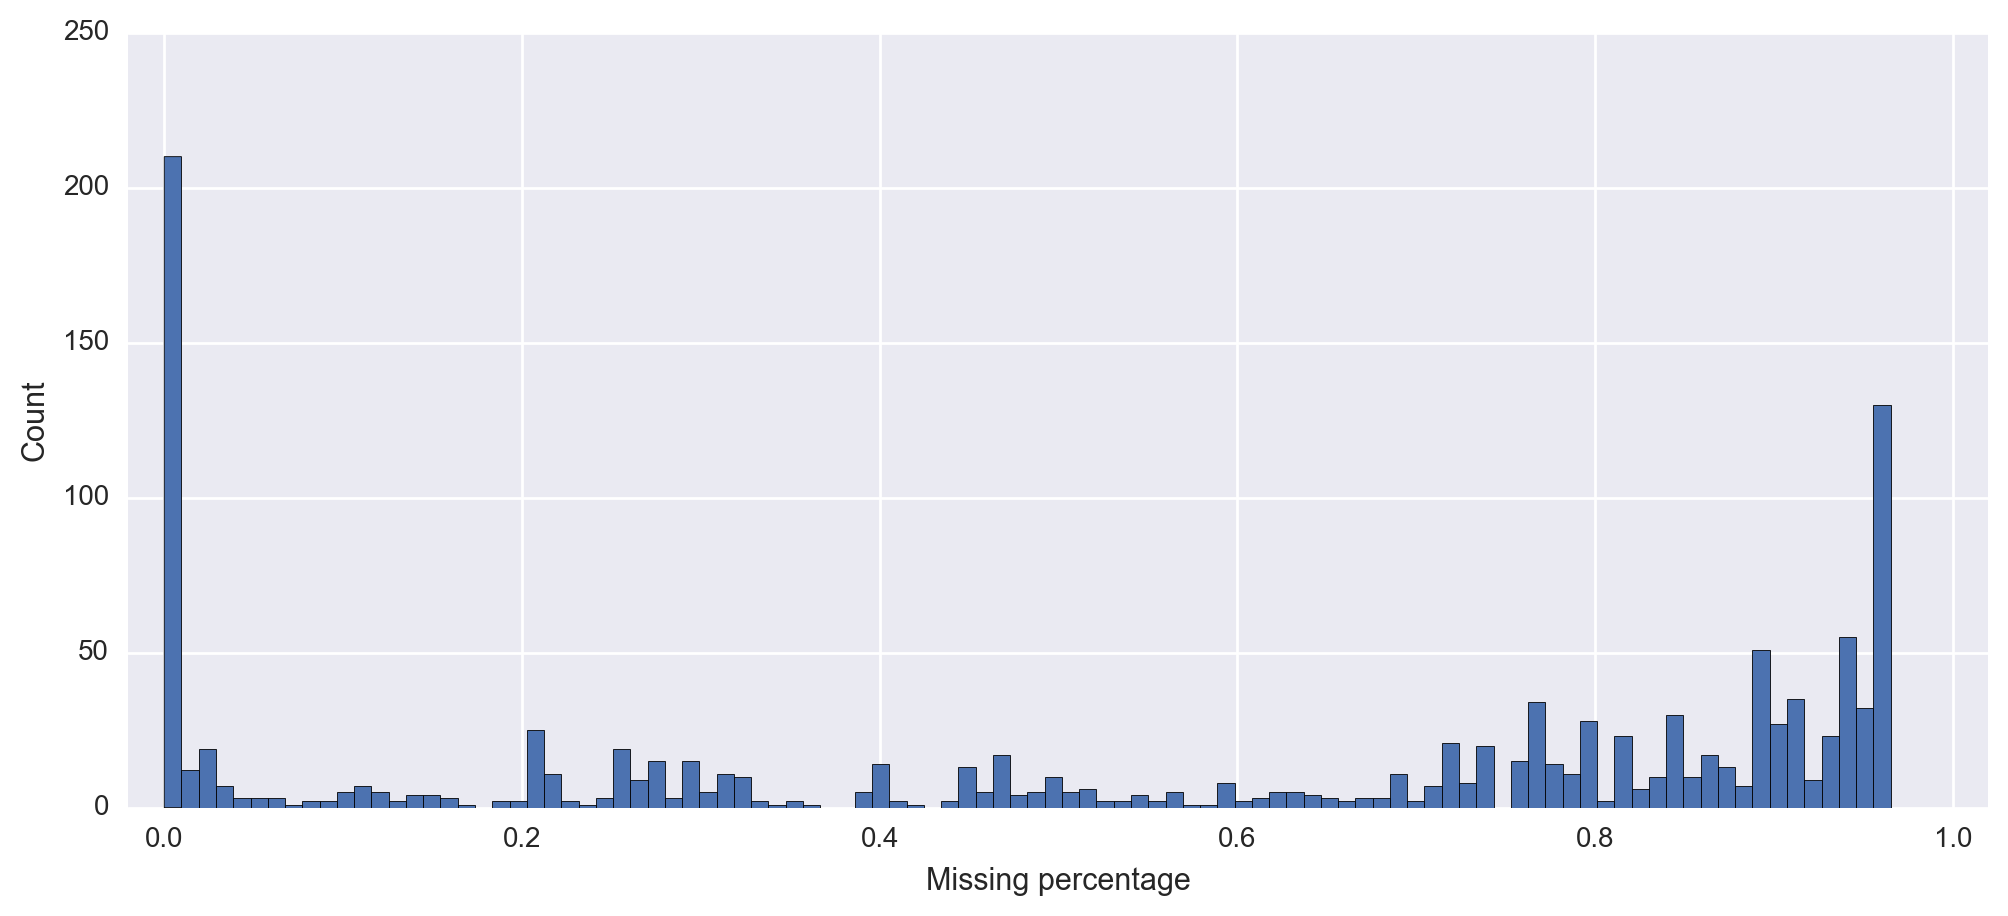

In [6]:
missing_percent = []
for column in abdose_adult:
    if abdose_adult[column].isnull().sum() < 140:
        num_missing = abdose_adult[column].isnull().sum() / len(abdose_adult)
        missing_percent.append(num_missing)

fig = plt.figure(figsize=(12,5))
plt.hist(missing_percent, bins=100)
plt.xlim(-0.02, 1.02)
plt.xlabel('Missing percentage')
plt.ylabel('Count')
plt.savefig('missing_hist.pdf')

In [37]:
try_sample = pd.concat([abdose_adult['apache'],                        # Apache score
                        abdose_adult['fu48_wcc'],                      # White blood cell count 48h follow up
                        abdose_adult['fu48_crp'],                      # C-reactive protein 48h follow up
                        abdose_adult['fu48_hi_temp'],                  # Highest temperature 48h follow up
                        abdose_adult['fu48_clinical_outcome'],         # Clinical outcome 48h follow up
                        abdose_adult['fu7_wcc'],                       # White blood cell count 7d follow up
                        abdose_adult['fu7_crp'],                       # C-reactive protein 7d follow up
                        abdose_adult['fu7_hi_temp'],                   # Highest temperature 7d follow up
                        abdose_adult['fu7_clinical_outcome']], axis=1) # Clinical outcome 7d follow up

In [38]:
# Percentage of missing data
print('----------------------------------------')
print('Percentage of missing/nonexistent values')
try_sample.isnull().sum().sort_values(ascending=False) / len(try_sample)

----------------------------------------
Percentage of missing/nonexistent values


fu7_crp                  0.493056
fu7_hi_temp              0.465278
fu7_wcc                  0.465278
fu48_hi_temp             0.305556
fu48_crp                 0.298611
fu48_wcc                 0.298611
apache                   0.020833
fu7_clinical_outcome     0.000000
fu48_clinical_outcome    0.000000
dtype: float64

In [39]:
# 1 indicates 'success', 0 indicates 'failure' (clinical outcome 2, 3 & 4) 

try_sample['fu48_clinical_outcome'] = try_sample['fu48_clinical_outcome'].replace(2,0)
try_sample['fu48_clinical_outcome'] = try_sample['fu48_clinical_outcome'].replace(3,0)
try_sample['fu48_clinical_outcome'] = try_sample['fu48_clinical_outcome'].replace(4,0)

try_sample['fu7_clinical_outcome'] = try_sample['fu7_clinical_outcome'].replace(2,0)
try_sample['fu7_clinical_outcome'] = try_sample['fu7_clinical_outcome'].replace(3,0)
try_sample['fu7_clinical_outcome'] = try_sample['fu7_clinical_outcome'].replace(4,0)

try_sample.head(10)

,apache,fu48_wcc,fu48_crp,fu48_hi_temp,fu48_clinical_outcome,fu7_wcc,fu7_crp,fu7_hi_temp,fu7_clinical_outcome
0,14.0,14.0,108.6,36.0,1,12.9,67.9,36.9,0
1,21.0,10.8,29.6,37.3,0,8.4,34.7,36.5,0
2,24.0,9.2,21.2,36.8,0,8.5,13.1,36.9,1
3,16.0,NaN,NaN,NaN,0,NaN,NaN,NaN,0
4,24.0,12.5,110.3,36.9,1,11.0,78.9,37.2,1
5,15.0,10.8,8.2,37.2,0,7.0,0.0,37.0,1
6,15.0,15.6,520.6,37.1,0,16.9,63.7,38.0,1
7,4.0,13.9,254.0,37.0,1,15.1,162.2,36.9,0
8,15.0,NaN,NaN,NaN,0,NaN,NaN,NaN,1
9,18.0,16.1,86.3,36.5,1,9.9,95.4,36.7,1


In [40]:
# Generate unique random values for missing data

# for i in range(0, 144):
#     if pd.isnull(try_sample['fu48_wcc'][i]) == True:
#         try_sample['fu48_wcc'][i] = (max(try_sample['fu48_wcc']) - min(try_sample['fu48_wcc']))\
#         *round(np.random.uniform(0.0, 1.0))

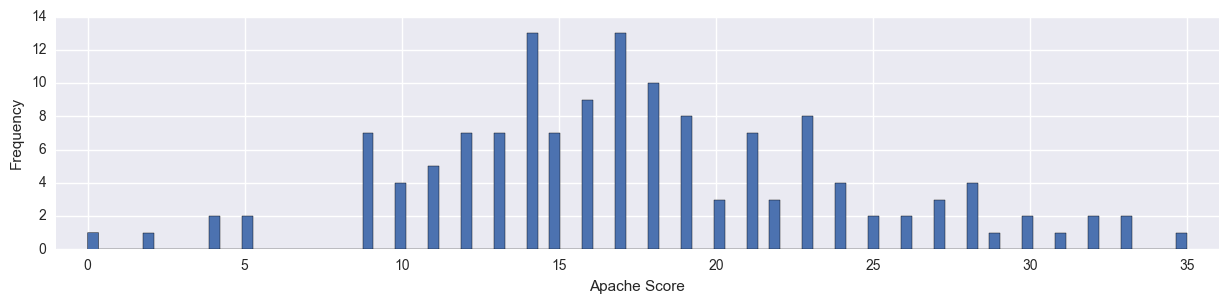

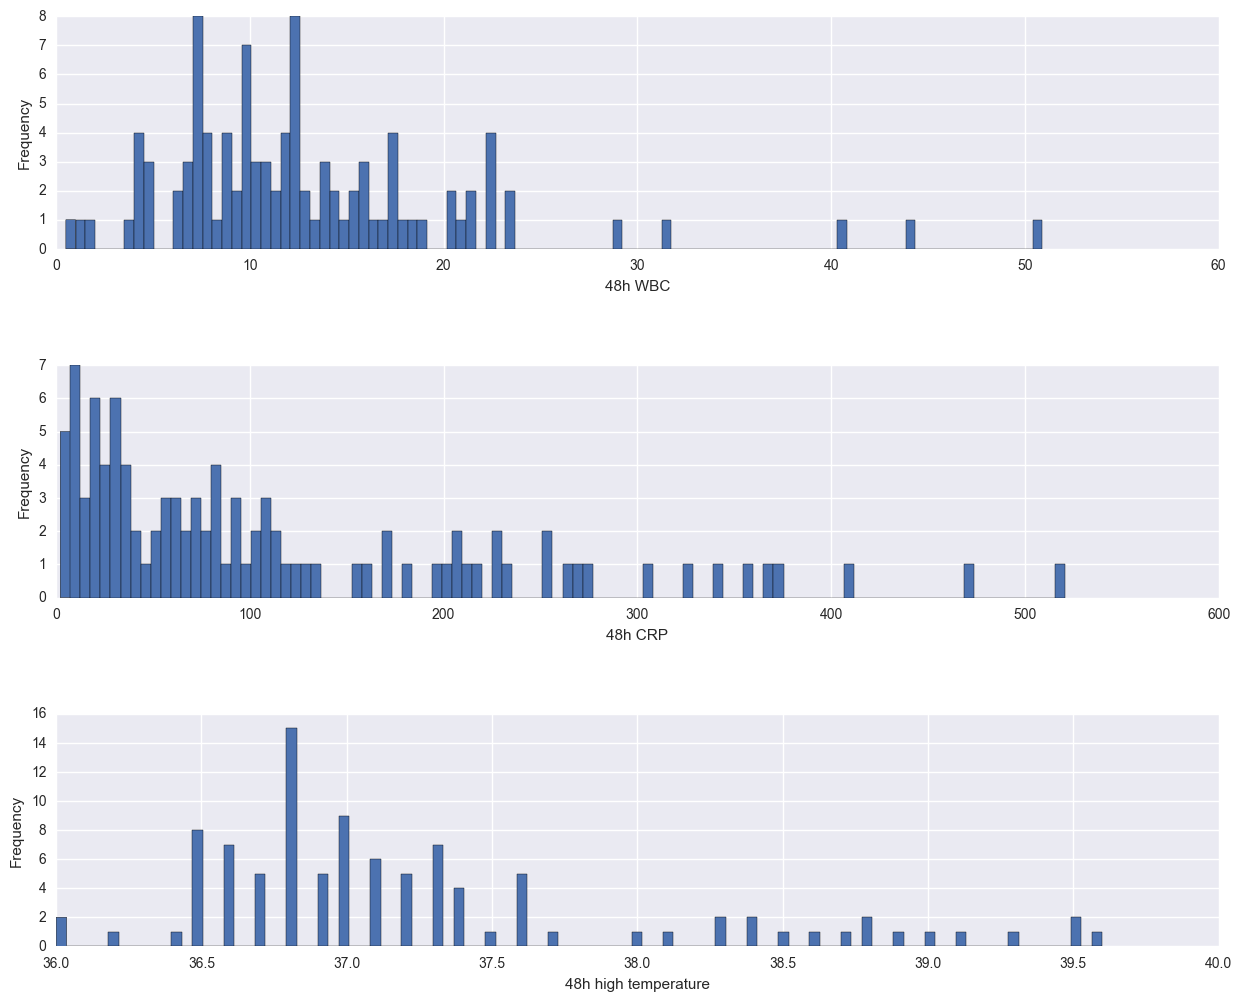

In [7]:
# Histogram of 48hr follow up outcomes

try_sample['apache'].plot(kind='hist', bins=100, figsize=(15,3), xlim=(-1, 36))
plt.xlabel('Apache Score')

fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(15,12))
fig.subplots_adjust(hspace=.5)

try_sample['fu48_wcc'].plot(kind='hist', bins=100, ax=axis1)
axis1.set_xlabel('48h WBC')


try_sample['fu48_crp'].plot(kind='hist', bins=100, ax=axis2)
axis2.set_xlabel('48h CRP')

try_sample['fu48_hi_temp'].plot(kind='hist', bins=100, ax=axis3)
axis3.set_xlabel('48h high temperature')

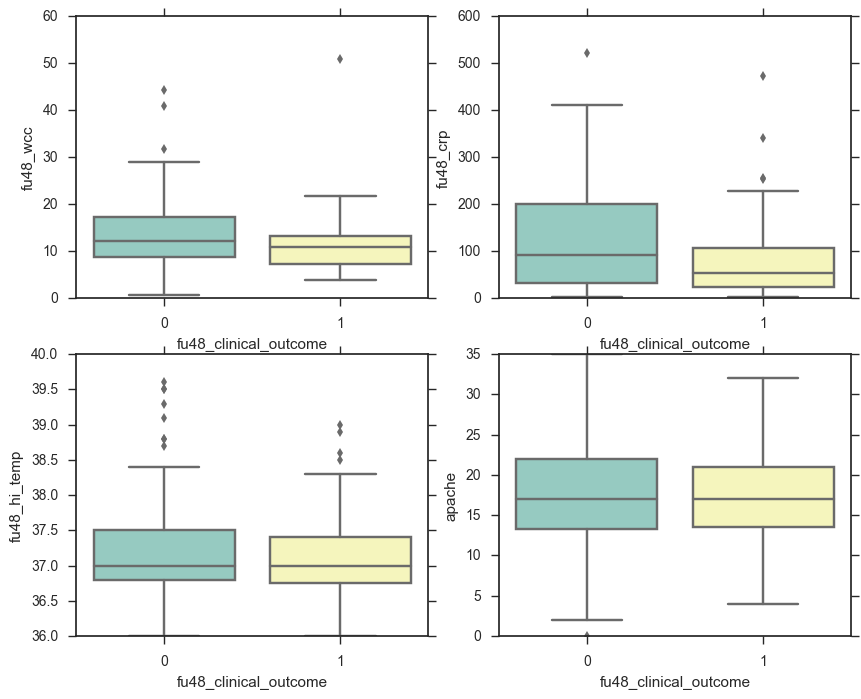

In [8]:
# Boxplots of 48h outcomes against different predictors

sns.set(style="ticks")
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
sns.boxplot(x="fu48_clinical_outcome", y="fu48_wcc", data=try_sample, palette="Set3")

ax2 = fig.add_subplot(222)
sns.boxplot(x="fu48_clinical_outcome", y="fu48_crp", data=try_sample, palette="Set3")

ax3 = fig.add_subplot(223)
sns.boxplot(x="fu48_clinical_outcome", y="fu48_hi_temp", data=try_sample, palette="Set3")

ax4 = fig.add_subplot(224)
sns.boxplot(x="fu48_clinical_outcome", y="apache", data=try_sample, palette="Set3")

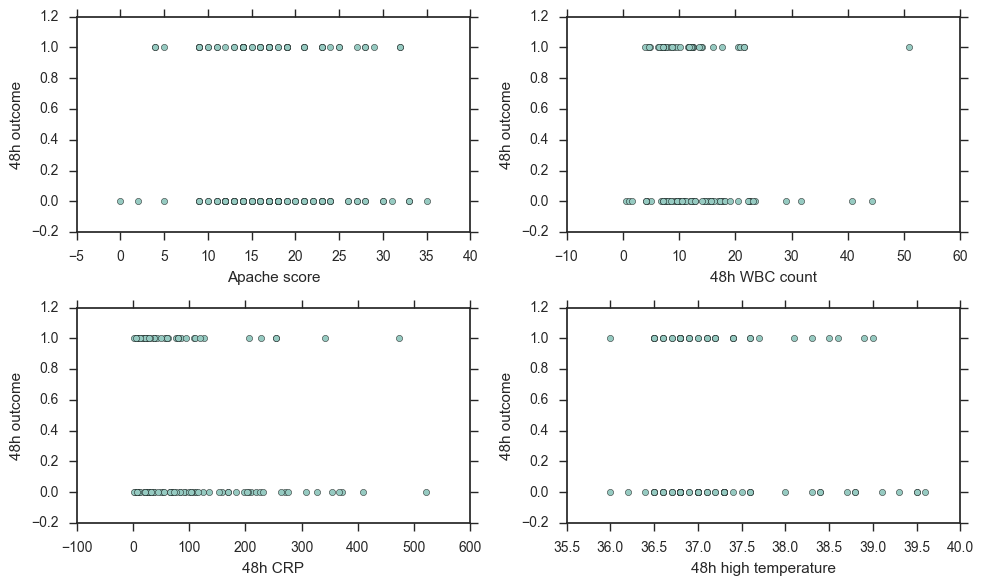

In [9]:
# Scatter plots 48h outcome
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(221)
plt.scatter(try_sample['apache'], try_sample['fu48_clinical_outcome'], c='#96cac1')
plt.xlabel('Apache score')
plt.ylabel('48h outcome')

ax2 = fig.add_subplot(222)
plt.scatter(try_sample['fu48_wcc'], try_sample['fu48_clinical_outcome'], c='#96cac1')
plt.xlabel('48h WBC count')
plt.ylabel('48h outcome')

ax3 = fig.add_subplot(223)
plt.scatter(try_sample['fu48_crp'], try_sample['fu48_clinical_outcome'], c='#96cac1')
plt.xlabel('48h CRP')
plt.ylabel('48h outcome')

ax4 = fig.add_subplot(224)
plt.scatter(try_sample['fu48_hi_temp'], try_sample['fu48_clinical_outcome'], c='#96cac1')
plt.xlabel('48h high temperature')
plt.ylabel('48h outcome')

plt.tight_layout()

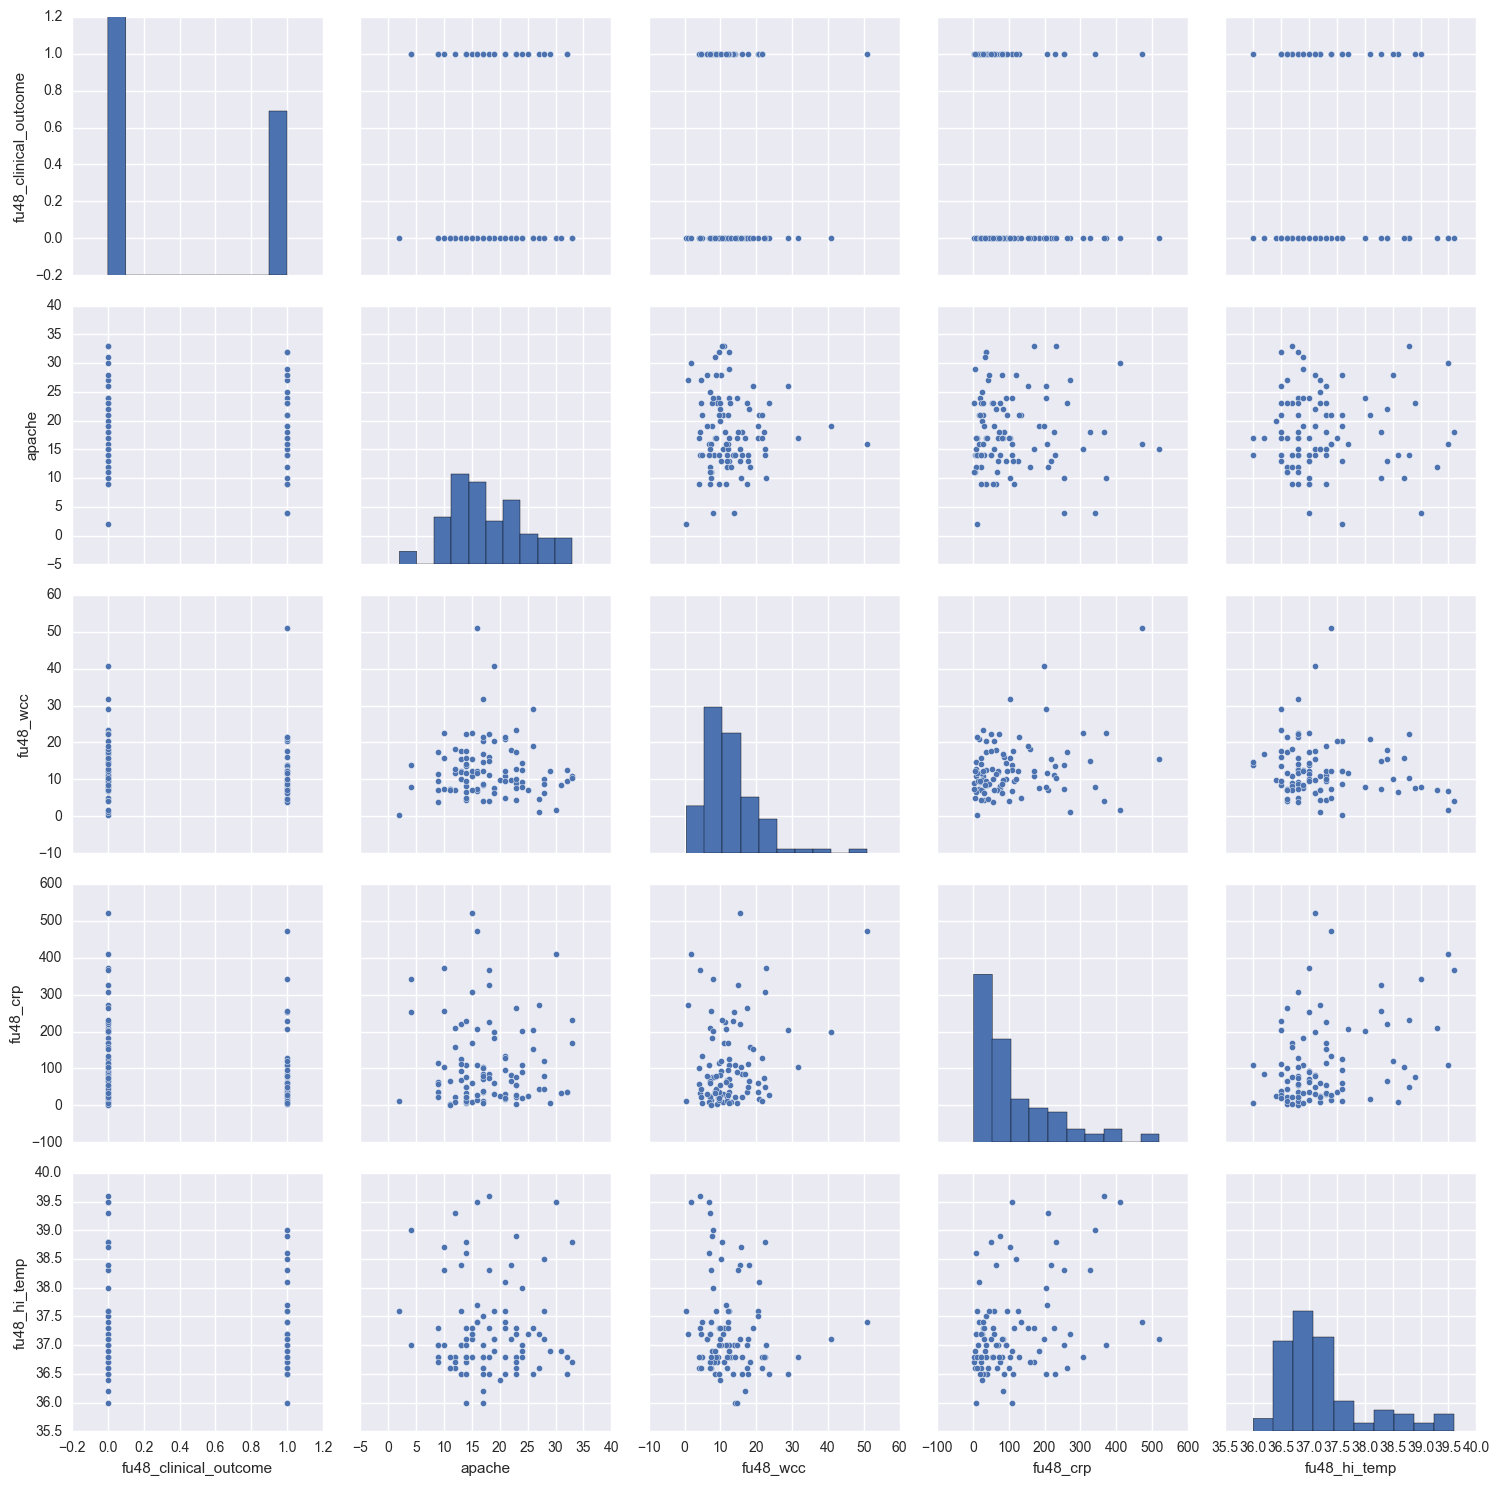

In [10]:
# Scatter plots 48h outcomes

sns.set()
cols = ['fu48_clinical_outcome', 'apache', 'fu48_wcc', 'fu48_crp', 'fu48_hi_temp']
sns.pairplot(try_sample[cols].dropna(), size=3)
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


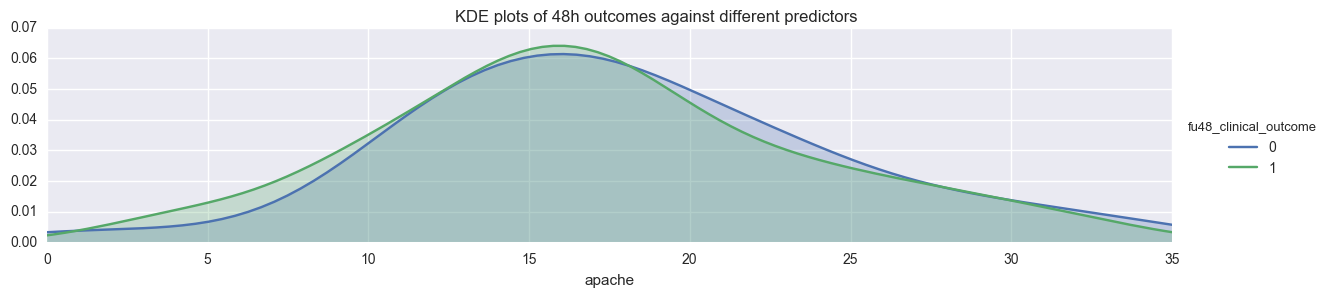

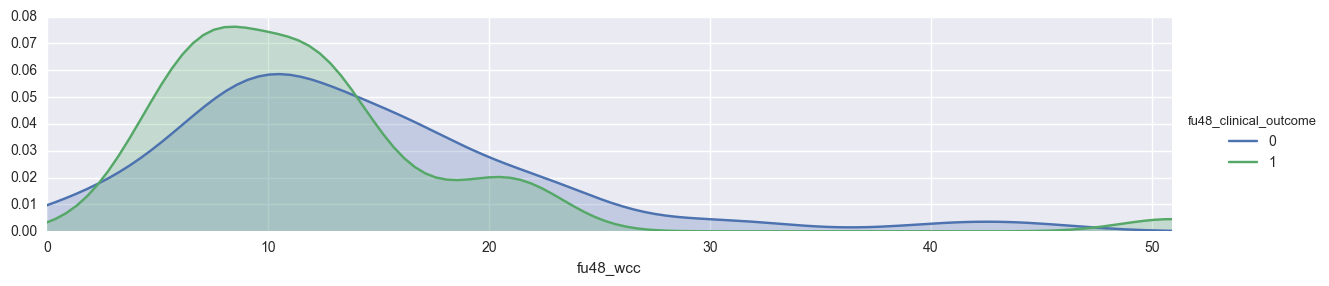

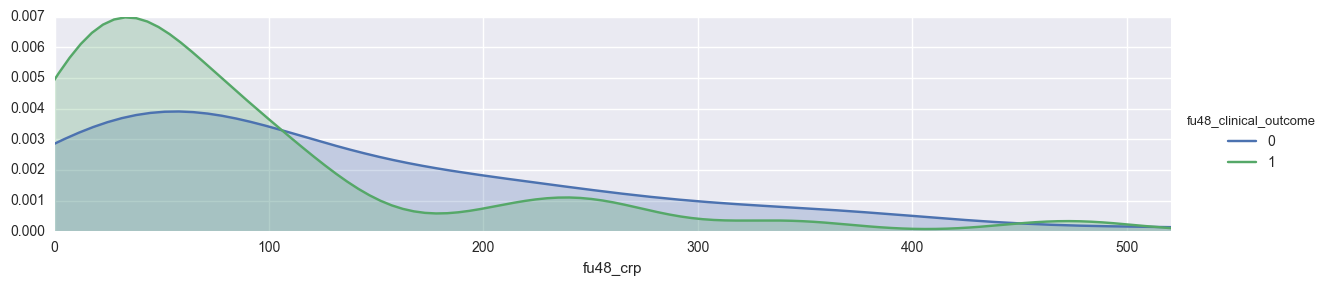

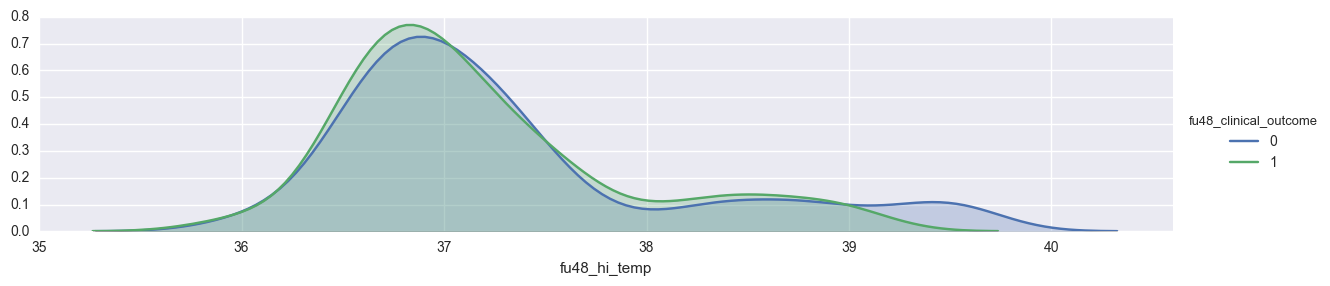

In [11]:
# KDE plots of 48h outcomes

facet = sns.FacetGrid(try_sample, hue='fu48_clinical_outcome',aspect=4)
facet.map(sns.kdeplot,'apache',shade= True)
facet.set(xlim=(0, try_sample['apache'].max()))
facet.add_legend()
facet.fig.suptitle('KDE plots of 48h outcomes against different predictors')

ax1 = sns.FacetGrid(try_sample, hue='fu48_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'fu48_wcc',shade= True)
ax1.set(xlim=(0, try_sample['fu48_wcc'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(try_sample, hue='fu48_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'fu48_crp',shade= True)
ax2.set(xlim=(0, try_sample['fu48_crp'].max()))
ax2.add_legend()

ax3 = sns.FacetGrid(try_sample, hue='fu48_clinical_outcome',aspect=4)
ax3.map(sns.kdeplot,'fu48_hi_temp',shade= True)
ax3.set(xlim=(35, try_sample['fu48_hi_temp'].max()+1))
ax3.add_legend()

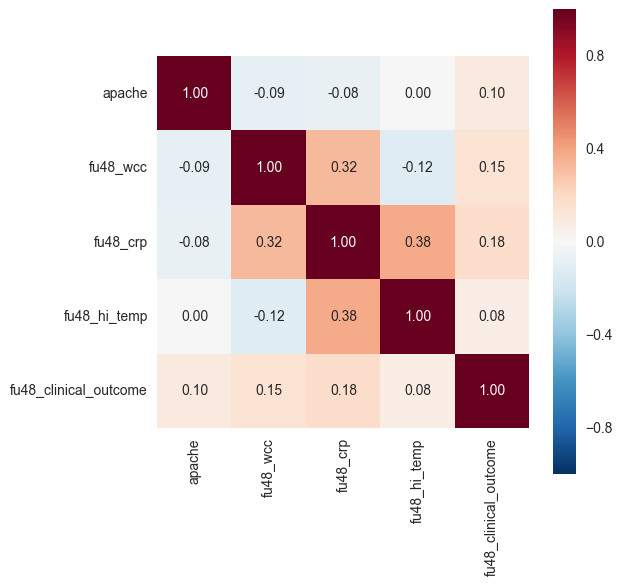

In [12]:
# Correlation matrix 48h outcomes
sample_48h = pd.concat([abdose_adult['apache'],
                        abdose_adult['fu48_wcc'], 
                        abdose_adult['fu48_crp'],
                        abdose_adult['fu48_hi_temp'],
                        abdose_adult['fu48_clinical_outcome']], axis=1)
corrmat_48h = sample_48h.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corrmat_48h, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

------------ 7 days follow up --------------

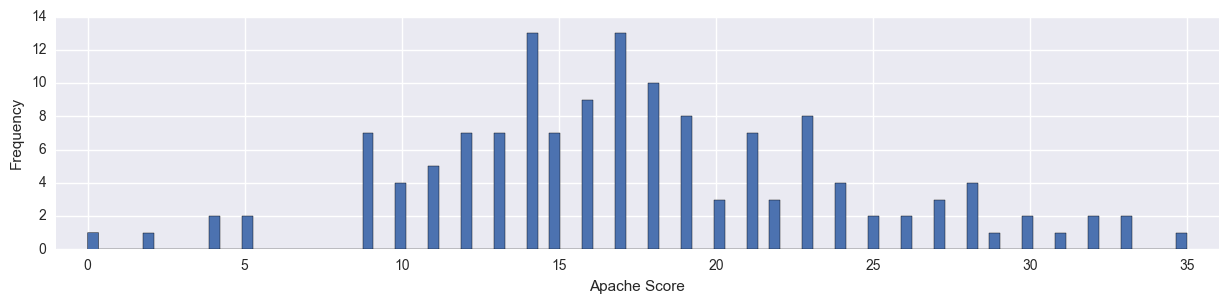

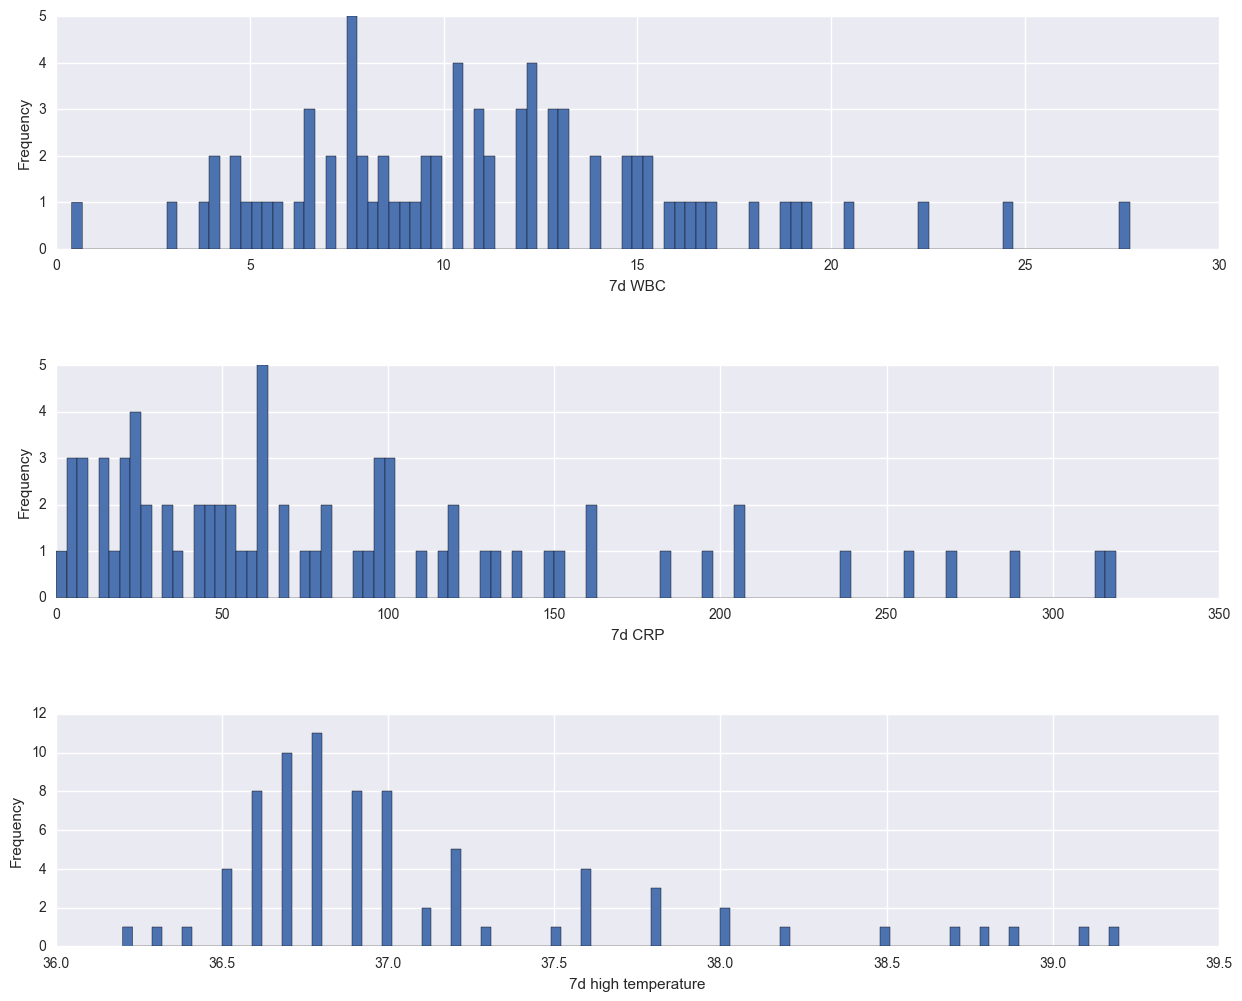

In [13]:
# Histogram of 7day follow up outcomes

try_sample['apache'].plot(kind='hist', bins=100, figsize=(15,3), xlim=(-1, 36))
plt.xlabel('Apache Score')

fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(15,12))
fig.subplots_adjust(hspace=.5)

try_sample['fu7_wcc'].plot(kind='hist', bins=100, ax=axis1)
axis1.set_xlabel('7d WBC')

try_sample['fu7_crp'].plot(kind='hist', bins=100, ax=axis2)
axis2.set_xlabel('7d CRP')

try_sample['fu7_hi_temp'].plot(kind='hist', bins=100, ax=axis3)
axis3.set_xlabel('7d high temperature')

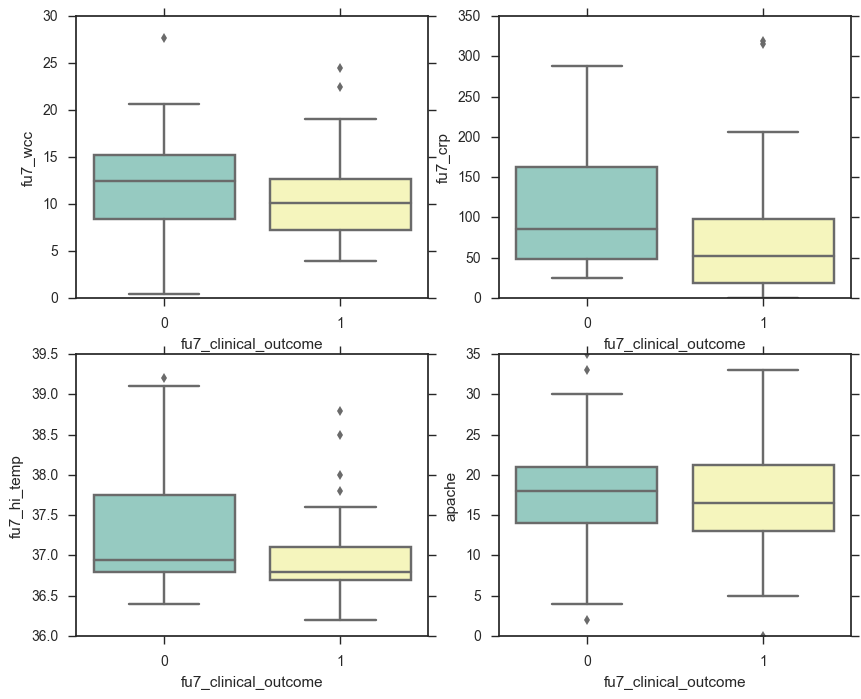

In [14]:
# Boxplots of 7d outcomes against different predictors

sns.set(style="ticks")
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
sns.boxplot(x="fu7_clinical_outcome", y="fu7_wcc", data=try_sample, palette="Set3")

ax2 = fig.add_subplot(222)
sns.boxplot(x="fu7_clinical_outcome", y="fu7_crp", data=try_sample, palette="Set3")

ax3 = fig.add_subplot(223)
sns.boxplot(x="fu7_clinical_outcome", y="fu7_hi_temp", data=try_sample, palette="Set3")

ax4 = fig.add_subplot(224)
sns.boxplot(x="fu7_clinical_outcome", y="apache", data=try_sample, palette="Set3")

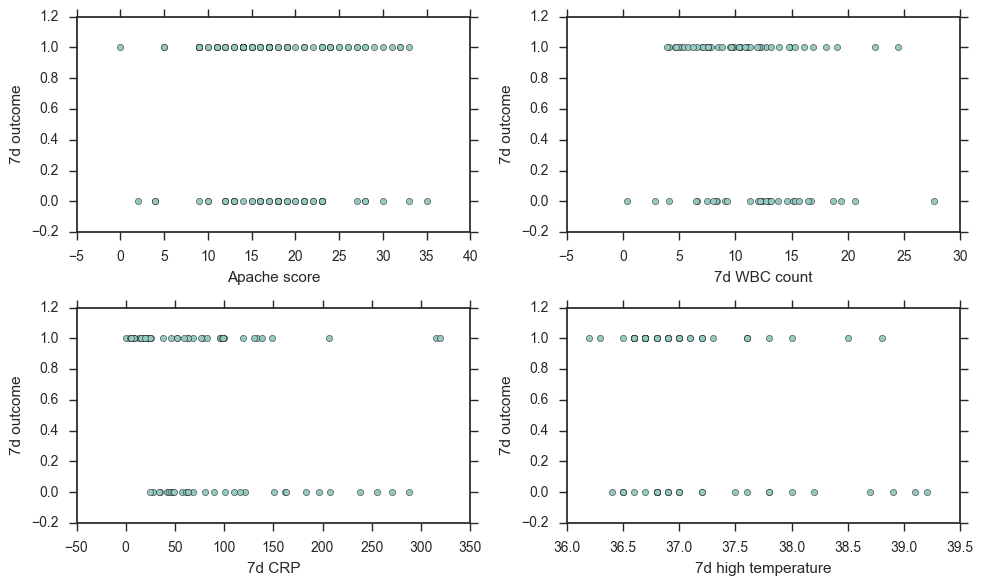

In [15]:
# Scatter plots 7d outcome
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(221)
plt.scatter(try_sample['apache'], try_sample['fu7_clinical_outcome'], c='#96cac1')
plt.xlabel('Apache score')
plt.ylabel('7d outcome')

ax2 = fig.add_subplot(222)
plt.scatter(try_sample['fu7_wcc'], try_sample['fu7_clinical_outcome'], c='#96cac1')
plt.xlabel('7d WBC count')
plt.ylabel('7d outcome')

ax3 = fig.add_subplot(223)
plt.scatter(try_sample['fu7_crp'], try_sample['fu7_clinical_outcome'], c='#96cac1')
plt.xlabel('7d CRP')
plt.ylabel('7d outcome')

ax4 = fig.add_subplot(224)
plt.scatter(try_sample['fu7_hi_temp'], try_sample['fu7_clinical_outcome'], c='#96cac1')
plt.xlabel('7d high temperature')
plt.ylabel('7d outcome')

plt.tight_layout()

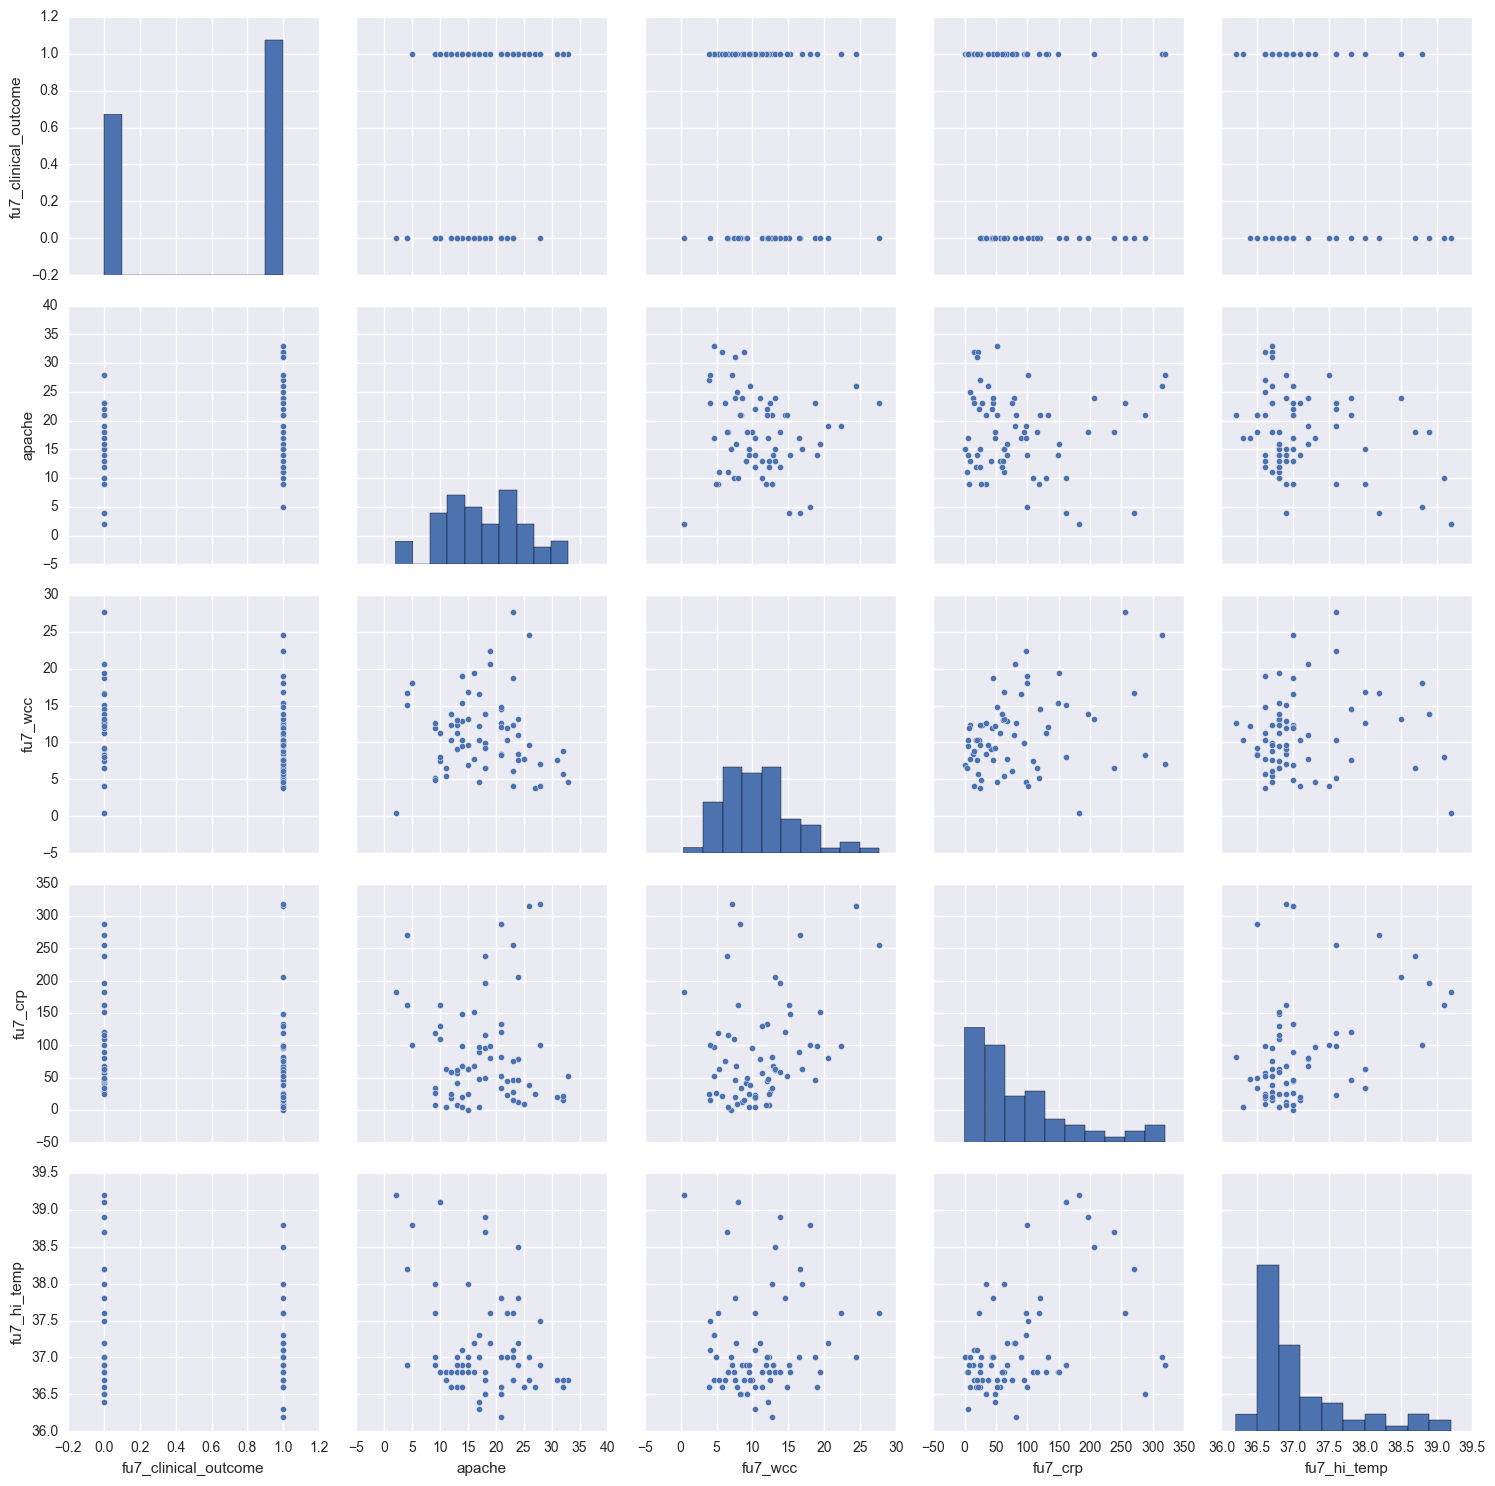

In [16]:
# Scatter plots 7d outcomes

sns.set()
cols = ['fu7_clinical_outcome', 'apache', 'fu7_wcc', 'fu7_crp', 'fu7_hi_temp']
sns.pairplot(try_sample[cols].dropna(), size=3)
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


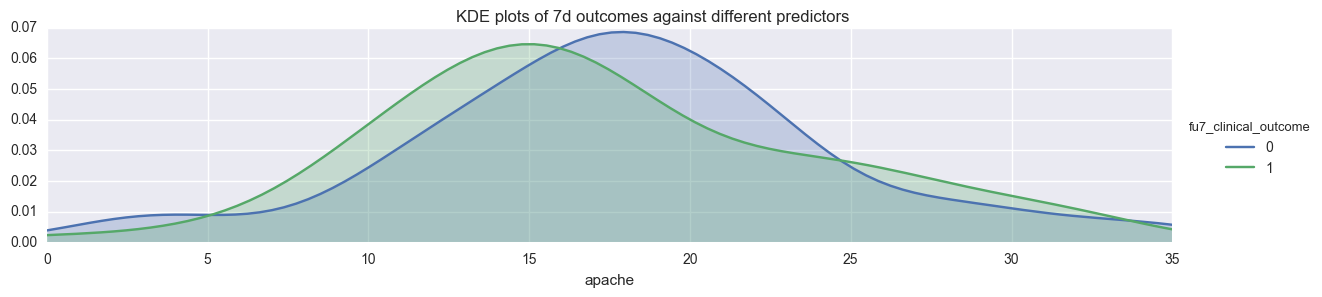

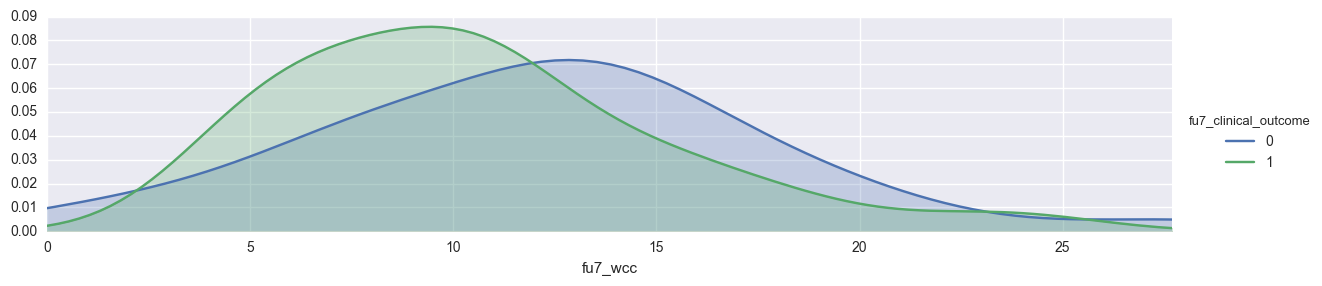

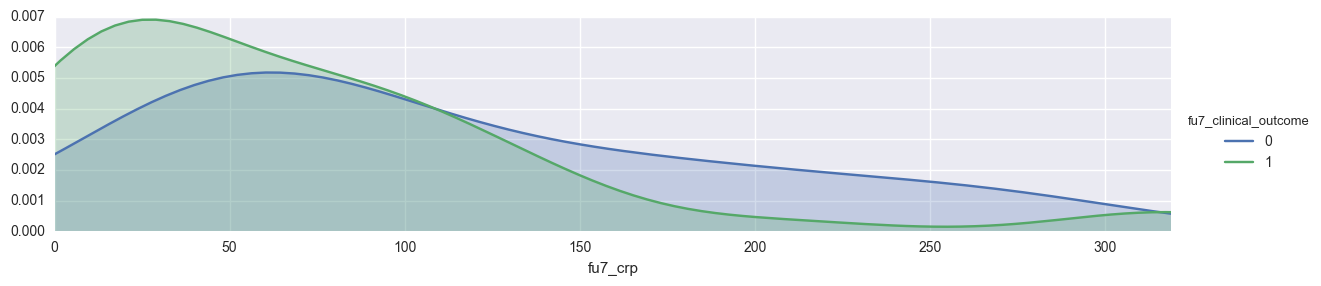

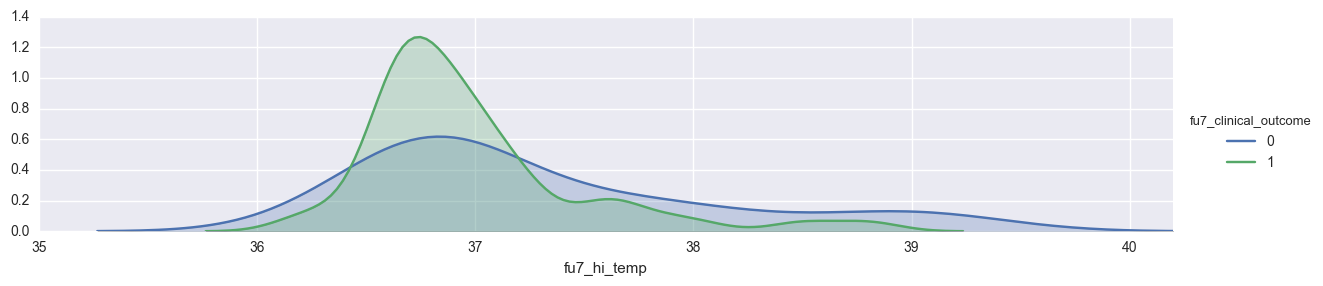

In [17]:
# KDE plots of 7d outcomes

facet = sns.FacetGrid(try_sample, hue='fu7_clinical_outcome',aspect=4)
facet.map(sns.kdeplot,'apache',shade= True)
facet.set(xlim=(0, try_sample['apache'].max()))
facet.add_legend()
facet.fig.suptitle('KDE plots of 7d outcomes against different predictors')

ax1 = sns.FacetGrid(try_sample, hue='fu7_clinical_outcome',aspect=4)
ax1.map(sns.kdeplot,'fu7_wcc',shade= True)
ax1.set(xlim=(0, try_sample['fu7_wcc'].max()))
ax1.add_legend()

ax2 = sns.FacetGrid(try_sample, hue='fu7_clinical_outcome',aspect=4)
ax2.map(sns.kdeplot,'fu7_crp',shade= True)
ax2.set(xlim=(0, try_sample['fu7_crp'].max()))
ax2.add_legend()

ax3 = sns.FacetGrid(try_sample, hue='fu7_clinical_outcome',aspect=4)
ax3.map(sns.kdeplot,'fu7_hi_temp',shade= True)
ax3.set(xlim=(35, try_sample['fu7_hi_temp'].max()+1))
ax3.add_legend()

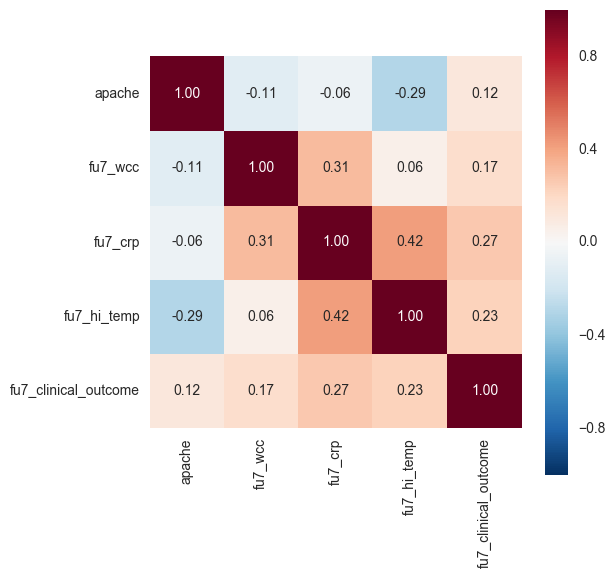

In [18]:
# Correlation matrix 7d outcomes
sample_7d = pd.concat([abdose_adult['apache'],
                        abdose_adult['fu7_wcc'], 
                        abdose_adult['fu7_crp'],
                        abdose_adult['fu7_hi_temp'],
                        abdose_adult['fu7_clinical_outcome']], axis=1)
corrmat_7d = sample_7d.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corrmat_7d, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [ ]:
# 2-D scatter plots of 48hr follow up adults (2 outcomes)

# outcomes = [1,0]
# colors = ['#f5f5bd',
#           '#96cac1']

# def attribute_color(outcome):
#     colors = {
#         0 : '#96cac1',
#         1 : '#f5f5bd'
#     }
#     return colors.get(outcome, 'black')

# color_outcome = list()
# for state in range(len(try_sample)):
#     color_outcome.append(attribute_color(try_sample['fu48_clinical_outcome'][state]))

# fig = plt.figure(figsize=(10,8))
# fig.add_subplot(221)
# plt.grid(True)
# plt.scatter(x = try_sample['apache'],
#             y = try_sample['fu48_wcc'],
#             s = 20,
#             c = color_outcome)

# legend1_line2d = list()
# for step in range(len(colors)):
#     legend1_line2d.append(mlines.Line2D([0], [0],
#                                         linestyle='none',
#                                         marker='o',
#                                         markersize=15,
#                                         markerfacecolor=colors[step]))
 
# legend1 = plt.legend(legend1_line2d,
#                       outcomes,
#                       numpoints = 1,
#                       fontsize = 10,
#                       loc = 'best',
#                       shadow = True)

# plt.gca().add_artist(legend1)
# plt.xlabel('Apache Score', fontsize=8)
# plt.ylabel('48h WBC counts', fontsize=8)

# fig.add_subplot(222)
# plt.grid(True)
# plt.scatter(x = try_sample['apache'],
#             y = try_sample['fu48_crp'],
#             s = 20,
#             c = color_outcome)

# legend1_line2d = list()
# for step in range(len(colors)):
#     legend1_line2d.append(mlines.Line2D([0], [0],
#                                         linestyle='none',
#                                         marker='o',
#                                         markersize=15,
#                                         markerfacecolor=colors[step]))
 
# legend1 = plt.legend(legend1_line2d,
#                       outcomes,
#                       numpoints = 1,
#                       fontsize = 10,
#                       loc = 'best',
#                       shadow = True)

# plt.gca().add_artist(legend1)
# plt.xlabel('Apache score', fontsize=8)
# plt.ylabel('48h CRP', fontsize=8)

# fig.add_subplot(223)
# plt.grid(True)
# plt.scatter(x = try_sample['apache'],
#             y = try_sample['fu48_hi_temp'],
#             s = 20,
#             c = color_outcome)

# legend1_line2d = list()
# for step in range(len(colors)):
#     legend1_line2d.append(mlines.Line2D([0], [0],
#                                         linestyle='none',
#                                         marker='o',
#                                         markersize=15,
#                                         markerfacecolor=colors[step]))
 
# legend1 = plt.legend(legend1_line2d,
#                       outcomes,
#                       numpoints = 1,
#                       fontsize = 10,
#                       loc = 'best',
#                       shadow = True)

# plt.gca().add_artist(legend1)
# plt.xlabel('Apache Score', fontsize=8)
# plt.ylabel('48h high temperature', fontsize=8)

# fig.add_subplot(224)
# plt.grid(True)
# plt.scatter(x = try_sample['fu48_wcc'],
#             y = try_sample['fu48_crp'],
#             s = 20,
#             c = color_outcome)

# legend1_line2d = list()
# for step in range(len(colors)):
#     legend1_line2d.append(mlines.Line2D([0], [0],
#                                         linestyle='none',
#                                         marker='o',
#                                         markersize=15,
#                                         markerfacecolor=colors[step]))
 
# legend1 = plt.legend(legend1_line2d,
#                       outcomes,
#                       numpoints = 1,
#                       fontsize = 10,
#                       loc = 'best',
#                       shadow = True)

# plt.gca().add_artist(legend1)
# plt.xlabel('48h WBC count', fontsize=8)
# plt.ylabel('48h CRP', fontsize=8)

# plt.tight_layout()

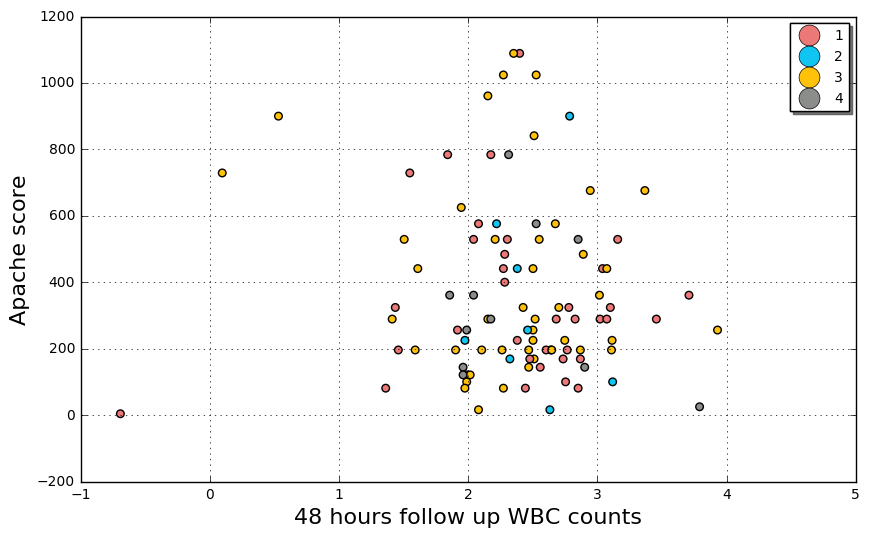

In [24]:
# 2-D Classifications of 48hr follow up adults (4 outcomes)

# outcomes = [1, 2, 3, 4]
# colors = ['#ed7878',
#           '#11c5f2',
#           '#ffc208',
#           '#8b8d8a']

# def attribute_color(outcome):
#     colors = {
#         1 : '#ed7878',
#         2 : '#11c5f2',
#         3 : '#ffc208',
#         4 : '#8b8d8a',
#     }
#     return colors.get(outcome, 'black')

# color_outcome = list()
# for state in range(len(try_sample)):
#     color_outcome.append(attribute_color(try_sample['fu48_clinical_outcome'][state]))

# fig = plt.figure(figsize=(10,6))
# plt.scatter(x = try_sample['fu48_wcc'].apply(np.log),
#             y = try_sample['apache'].apply(np.square),
#             s = 30,
#             c = color_outcome)

# legend1_line2d = list()
# for step in range(len(colors)):
#     legend1_line2d.append(mlines.Line2D([0], [0],
#                                         linestyle='none',
#                                         marker='o',
#                                         markersize=15,
#                                         markerfacecolor=colors[step]))
 
# legend1 = plt.legend(legend1_line2d,
#                       outcomes,
#                       numpoints = 1,
#                       fontsize = 10,
#                       loc = 'best',
#                       shadow = True)

# plt.gca().add_artist(legend1)
# # plt.xlim(-2, 53)
# # plt.ylim(-2, 37)
# plt.xlabel('48 hours follow up WBC counts', fontsize=16)
# plt.ylabel('Apache score', fontsize=16)
# plt.grid(True)